# 순환 신경망 - 나비야
#### 출처: [순환 신경망 모델 만들어보기](https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/)

## 다층 퍼셉트론 모델

In [1]:
# 사용할 패키지 불러오기
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# 랜덤시드 고정시키기
np.random.seed(5)

In [3]:
# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [4]:
# 데이터 준비하기

# 코드 사전 정의
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}
idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [5]:
# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [6]:
# 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)
dataset.shape

(50, 5)

In [7]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

MAX_IDX_VALUE = 13

In [8]:
# 입력값 정규화 시키기
x_train = x_train / float(MAX_IDX_VALUE)
x_train.shape

(50, 4)

In [9]:
# 라벨값에 대한 one-hot 인코딩 수행
y_train = to_categorical(y_train)
one_hot_vec_size = y_train.shape[1]
one_hot_vec_size

12

In [10]:
# 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               640       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 12)                1548      
Total params: 18,700
Trainable params: 18,700
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# 모델 학습시키기
history = model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2)

Train on 50 samples
Epoch 1/2000
50/50 - 0s - loss: 2.4371 - acc: 0.2200
Epoch 2/2000
50/50 - 0s - loss: 2.3118 - acc: 0.3400
Epoch 3/2000
50/50 - 0s - loss: 2.1990 - acc: 0.3400
Epoch 4/2000
50/50 - 0s - loss: 2.1049 - acc: 0.3400
Epoch 5/2000
50/50 - 0s - loss: 2.0279 - acc: 0.3400
Epoch 6/2000
50/50 - 0s - loss: 1.9732 - acc: 0.3400
Epoch 7/2000
50/50 - 0s - loss: 1.9386 - acc: 0.3400
Epoch 8/2000
50/50 - 0s - loss: 1.9147 - acc: 0.3400
Epoch 9/2000
50/50 - 0s - loss: 1.8919 - acc: 0.3400
Epoch 10/2000
50/50 - 0s - loss: 1.8735 - acc: 0.3400
Epoch 11/2000
50/50 - 0s - loss: 1.8505 - acc: 0.3400
Epoch 12/2000
50/50 - 0s - loss: 1.8402 - acc: 0.3400
Epoch 13/2000
50/50 - 0s - loss: 1.8197 - acc: 0.3400
Epoch 14/2000
50/50 - 0s - loss: 1.8048 - acc: 0.3400
Epoch 15/2000
50/50 - 0s - loss: 1.7941 - acc: 0.3400
Epoch 16/2000
50/50 - 0s - loss: 1.7770 - acc: 0.3400
Epoch 17/2000
50/50 - 0s - loss: 1.7616 - acc: 0.3400
Epoch 18/2000
50/50 - 0s - loss: 1.7518 - acc: 0.3400
Epoch 19/2000
50/

Epoch 152/2000
50/50 - 0s - loss: 1.1728 - acc: 0.5600
Epoch 153/2000
50/50 - 0s - loss: 1.1658 - acc: 0.5800
Epoch 154/2000
50/50 - 0s - loss: 1.1597 - acc: 0.5600
Epoch 155/2000
50/50 - 0s - loss: 1.1591 - acc: 0.5800
Epoch 156/2000
50/50 - 0s - loss: 1.1589 - acc: 0.5400
Epoch 157/2000
50/50 - 0s - loss: 1.1580 - acc: 0.5400
Epoch 158/2000
50/50 - 0s - loss: 1.1509 - acc: 0.5600
Epoch 159/2000
50/50 - 0s - loss: 1.1505 - acc: 0.6000
Epoch 160/2000
50/50 - 0s - loss: 1.1490 - acc: 0.6000
Epoch 161/2000
50/50 - 0s - loss: 1.1411 - acc: 0.6000
Epoch 162/2000
50/50 - 0s - loss: 1.1379 - acc: 0.5800
Epoch 163/2000
50/50 - 0s - loss: 1.1431 - acc: 0.5800
Epoch 164/2000
50/50 - 0s - loss: 1.1325 - acc: 0.5800
Epoch 165/2000
50/50 - 0s - loss: 1.1330 - acc: 0.5800
Epoch 166/2000
50/50 - 0s - loss: 1.1285 - acc: 0.5600
Epoch 167/2000
50/50 - 0s - loss: 1.1281 - acc: 0.5800
Epoch 168/2000
50/50 - 0s - loss: 1.1309 - acc: 0.5600
Epoch 169/2000
50/50 - 0s - loss: 1.1215 - acc: 0.6000
Epoch 170/

Epoch 301/2000
50/50 - 0s - loss: 0.8933 - acc: 0.6000
Epoch 302/2000
50/50 - 0s - loss: 0.8918 - acc: 0.6400
Epoch 303/2000
50/50 - 0s - loss: 0.8707 - acc: 0.6800
Epoch 304/2000
50/50 - 0s - loss: 0.8718 - acc: 0.6200
Epoch 305/2000
50/50 - 0s - loss: 0.8669 - acc: 0.6200
Epoch 306/2000
50/50 - 0s - loss: 0.8607 - acc: 0.6600
Epoch 307/2000
50/50 - 0s - loss: 0.8635 - acc: 0.6600
Epoch 308/2000
50/50 - 0s - loss: 0.8725 - acc: 0.6600
Epoch 309/2000
50/50 - 0s - loss: 0.8594 - acc: 0.6600
Epoch 310/2000
50/50 - 0s - loss: 0.8667 - acc: 0.6200
Epoch 311/2000
50/50 - 0s - loss: 0.8628 - acc: 0.6600
Epoch 312/2000
50/50 - 0s - loss: 0.8504 - acc: 0.6600
Epoch 313/2000
50/50 - 0s - loss: 0.8532 - acc: 0.6600
Epoch 314/2000
50/50 - 0s - loss: 0.8512 - acc: 0.6800
Epoch 315/2000
50/50 - 0s - loss: 0.8481 - acc: 0.6600
Epoch 316/2000
50/50 - 0s - loss: 0.8607 - acc: 0.6400
Epoch 317/2000
50/50 - 0s - loss: 0.8515 - acc: 0.6400
Epoch 318/2000
50/50 - 0s - loss: 0.8460 - acc: 0.6800
Epoch 319/

Epoch 450/2000
50/50 - 0s - loss: 0.6499 - acc: 0.7400
Epoch 451/2000
50/50 - 0s - loss: 0.6413 - acc: 0.7600
Epoch 452/2000
50/50 - 0s - loss: 0.6449 - acc: 0.7400
Epoch 453/2000
50/50 - 0s - loss: 0.6466 - acc: 0.7200
Epoch 454/2000
50/50 - 0s - loss: 0.6424 - acc: 0.7400
Epoch 455/2000
50/50 - 0s - loss: 0.6439 - acc: 0.7600
Epoch 456/2000
50/50 - 0s - loss: 0.6399 - acc: 0.7400
Epoch 457/2000
50/50 - 0s - loss: 0.6382 - acc: 0.7200
Epoch 458/2000
50/50 - 0s - loss: 0.6468 - acc: 0.7200
Epoch 459/2000
50/50 - 0s - loss: 0.6340 - acc: 0.7200
Epoch 460/2000
50/50 - 0s - loss: 0.6405 - acc: 0.7400
Epoch 461/2000
50/50 - 0s - loss: 0.6372 - acc: 0.7400
Epoch 462/2000
50/50 - 0s - loss: 0.6280 - acc: 0.7400
Epoch 463/2000
50/50 - 0s - loss: 0.6280 - acc: 0.7200
Epoch 464/2000
50/50 - 0s - loss: 0.6304 - acc: 0.7400
Epoch 465/2000
50/50 - 0s - loss: 0.6237 - acc: 0.7800
Epoch 466/2000
50/50 - 0s - loss: 0.6200 - acc: 0.7600
Epoch 467/2000
50/50 - 0s - loss: 0.6274 - acc: 0.7400
Epoch 468/

Epoch 599/2000
50/50 - 0s - loss: 0.4966 - acc: 0.8200
Epoch 600/2000
50/50 - 0s - loss: 0.4976 - acc: 0.8000
Epoch 601/2000
50/50 - 0s - loss: 0.4907 - acc: 0.8200
Epoch 602/2000
50/50 - 0s - loss: 0.4859 - acc: 0.8200
Epoch 603/2000
50/50 - 0s - loss: 0.4915 - acc: 0.8200
Epoch 604/2000
50/50 - 0s - loss: 0.4911 - acc: 0.8200
Epoch 605/2000
50/50 - 0s - loss: 0.4873 - acc: 0.8200
Epoch 606/2000
50/50 - 0s - loss: 0.4935 - acc: 0.8200
Epoch 607/2000
50/50 - 0s - loss: 0.4953 - acc: 0.8000
Epoch 608/2000
50/50 - 0s - loss: 0.4903 - acc: 0.8200
Epoch 609/2000
50/50 - 0s - loss: 0.4920 - acc: 0.8400
Epoch 610/2000
50/50 - 0s - loss: 0.4921 - acc: 0.7800
Epoch 611/2000
50/50 - 0s - loss: 0.4905 - acc: 0.8400
Epoch 612/2000
50/50 - 0s - loss: 0.4869 - acc: 0.8600
Epoch 613/2000
50/50 - 0s - loss: 0.4930 - acc: 0.8400
Epoch 614/2000
50/50 - 0s - loss: 0.4866 - acc: 0.8400
Epoch 615/2000
50/50 - 0s - loss: 0.4813 - acc: 0.8200
Epoch 616/2000
50/50 - 0s - loss: 0.4898 - acc: 0.8200
Epoch 617/

Epoch 748/2000
50/50 - 0s - loss: 0.3925 - acc: 0.8600
Epoch 749/2000
50/50 - 0s - loss: 0.4019 - acc: 0.8600
Epoch 750/2000
50/50 - 0s - loss: 0.3864 - acc: 0.8600
Epoch 751/2000
50/50 - 0s - loss: 0.3866 - acc: 0.8800
Epoch 752/2000
50/50 - 0s - loss: 0.3947 - acc: 0.8800
Epoch 753/2000
50/50 - 0s - loss: 0.3862 - acc: 0.8800
Epoch 754/2000
50/50 - 0s - loss: 0.3901 - acc: 0.8200
Epoch 755/2000
50/50 - 0s - loss: 0.3839 - acc: 0.8800
Epoch 756/2000
50/50 - 0s - loss: 0.3839 - acc: 0.8600
Epoch 757/2000
50/50 - 0s - loss: 0.3896 - acc: 0.8400
Epoch 758/2000
50/50 - 0s - loss: 0.4003 - acc: 0.8600
Epoch 759/2000
50/50 - 0s - loss: 0.3867 - acc: 0.8600
Epoch 760/2000
50/50 - 0s - loss: 0.3793 - acc: 0.8600
Epoch 761/2000
50/50 - 0s - loss: 0.3855 - acc: 0.8400
Epoch 762/2000
50/50 - 0s - loss: 0.3804 - acc: 0.8600
Epoch 763/2000
50/50 - 0s - loss: 0.3784 - acc: 0.8600
Epoch 764/2000
50/50 - 0s - loss: 0.3802 - acc: 0.8800
Epoch 765/2000
50/50 - 0s - loss: 0.3819 - acc: 0.8800
Epoch 766/

Epoch 897/2000
50/50 - 0s - loss: 0.3359 - acc: 0.8800
Epoch 898/2000
50/50 - 0s - loss: 0.3451 - acc: 0.8600
Epoch 899/2000
50/50 - 0s - loss: 0.3091 - acc: 0.9200
Epoch 900/2000
50/50 - 0s - loss: 0.3368 - acc: 0.8600
Epoch 901/2000
50/50 - 0s - loss: 0.3068 - acc: 0.8800
Epoch 902/2000
50/50 - 0s - loss: 0.3148 - acc: 0.9200
Epoch 903/2000
50/50 - 0s - loss: 0.3241 - acc: 0.9200
Epoch 904/2000
50/50 - 0s - loss: 0.3098 - acc: 0.9200
Epoch 905/2000
50/50 - 0s - loss: 0.3202 - acc: 0.9000
Epoch 906/2000
50/50 - 0s - loss: 0.3108 - acc: 0.9200
Epoch 907/2000
50/50 - 0s - loss: 0.3082 - acc: 0.9200
Epoch 908/2000
50/50 - 0s - loss: 0.3249 - acc: 0.9200
Epoch 909/2000
50/50 - 0s - loss: 0.3097 - acc: 0.9200
Epoch 910/2000
50/50 - 0s - loss: 0.3169 - acc: 0.9000
Epoch 911/2000
50/50 - 0s - loss: 0.3070 - acc: 0.9400
Epoch 912/2000
50/50 - 0s - loss: 0.3107 - acc: 0.9200
Epoch 913/2000
50/50 - 0s - loss: 0.3241 - acc: 0.8800
Epoch 914/2000
50/50 - 0s - loss: 0.3022 - acc: 0.9200
Epoch 915/

Epoch 1046/2000
50/50 - 0s - loss: 0.2595 - acc: 0.9200
Epoch 1047/2000
50/50 - 0s - loss: 0.2582 - acc: 0.9200
Epoch 1048/2000
50/50 - 0s - loss: 0.2707 - acc: 0.9000
Epoch 1049/2000
50/50 - 0s - loss: 0.2566 - acc: 0.9200
Epoch 1050/2000
50/50 - 0s - loss: 0.2698 - acc: 0.9200
Epoch 1051/2000
50/50 - 0s - loss: 0.2726 - acc: 0.8600
Epoch 1052/2000
50/50 - 0s - loss: 0.2729 - acc: 0.8800
Epoch 1053/2000
50/50 - 0s - loss: 0.2636 - acc: 0.9200
Epoch 1054/2000
50/50 - 0s - loss: 0.2666 - acc: 0.9200
Epoch 1055/2000
50/50 - 0s - loss: 0.2790 - acc: 0.9000
Epoch 1056/2000
50/50 - 0s - loss: 0.2649 - acc: 0.9200
Epoch 1057/2000
50/50 - 0s - loss: 0.2549 - acc: 0.9000
Epoch 1058/2000
50/50 - 0s - loss: 0.2559 - acc: 0.9000
Epoch 1059/2000
50/50 - 0s - loss: 0.2541 - acc: 0.9200
Epoch 1060/2000
50/50 - 0s - loss: 0.2531 - acc: 0.9200
Epoch 1061/2000
50/50 - 0s - loss: 0.2534 - acc: 0.9200
Epoch 1062/2000
50/50 - 0s - loss: 0.2513 - acc: 0.9000
Epoch 1063/2000
50/50 - 0s - loss: 0.2554 - acc:

Epoch 1193/2000
50/50 - 0s - loss: 0.2225 - acc: 0.9200
Epoch 1194/2000
50/50 - 0s - loss: 0.2367 - acc: 0.8800
Epoch 1195/2000
50/50 - 0s - loss: 0.2395 - acc: 0.9200
Epoch 1196/2000
50/50 - 0s - loss: 0.2311 - acc: 0.9200
Epoch 1197/2000
50/50 - 0s - loss: 0.2229 - acc: 0.8800
Epoch 1198/2000
50/50 - 0s - loss: 0.2187 - acc: 0.9200
Epoch 1199/2000
50/50 - 0s - loss: 0.2248 - acc: 0.9200
Epoch 1200/2000
50/50 - 0s - loss: 0.2212 - acc: 0.9000
Epoch 1201/2000
50/50 - 0s - loss: 0.2314 - acc: 0.8800
Epoch 1202/2000
50/50 - 0s - loss: 0.2304 - acc: 0.9200
Epoch 1203/2000
50/50 - 0s - loss: 0.2418 - acc: 0.8400
Epoch 1204/2000
50/50 - 0s - loss: 0.2256 - acc: 0.9000
Epoch 1205/2000
50/50 - 0s - loss: 0.2177 - acc: 0.9200
Epoch 1206/2000
50/50 - 0s - loss: 0.2166 - acc: 0.9000
Epoch 1207/2000
50/50 - 0s - loss: 0.2159 - acc: 0.9000
Epoch 1208/2000
50/50 - 0s - loss: 0.2148 - acc: 0.9200
Epoch 1209/2000
50/50 - 0s - loss: 0.2263 - acc: 0.9000
Epoch 1210/2000
50/50 - 0s - loss: 0.2288 - acc:

Epoch 1340/2000
50/50 - 0s - loss: 0.2187 - acc: 0.8800
Epoch 1341/2000
50/50 - 0s - loss: 0.1938 - acc: 0.9200
Epoch 1342/2000
50/50 - 0s - loss: 0.2005 - acc: 0.9000
Epoch 1343/2000
50/50 - 0s - loss: 0.2116 - acc: 0.9000
Epoch 1344/2000
50/50 - 0s - loss: 0.1999 - acc: 0.9000
Epoch 1345/2000
50/50 - 0s - loss: 0.1984 - acc: 0.9200
Epoch 1346/2000
50/50 - 0s - loss: 0.1947 - acc: 0.9400
Epoch 1347/2000
50/50 - 0s - loss: 0.2126 - acc: 0.9200
Epoch 1348/2000
50/50 - 0s - loss: 0.1884 - acc: 0.9200
Epoch 1349/2000
50/50 - 0s - loss: 0.2160 - acc: 0.9000
Epoch 1350/2000
50/50 - 0s - loss: 0.1903 - acc: 0.9400
Epoch 1351/2000
50/50 - 0s - loss: 0.2062 - acc: 0.9200
Epoch 1352/2000
50/50 - 0s - loss: 0.1949 - acc: 0.9200
Epoch 1353/2000
50/50 - 0s - loss: 0.2057 - acc: 0.9000
Epoch 1354/2000
50/50 - 0s - loss: 0.1895 - acc: 0.9000
Epoch 1355/2000
50/50 - 0s - loss: 0.1981 - acc: 0.9200
Epoch 1356/2000
50/50 - 0s - loss: 0.1977 - acc: 0.9000
Epoch 1357/2000
50/50 - 0s - loss: 0.1939 - acc:

Epoch 1487/2000
50/50 - 0s - loss: 0.1757 - acc: 0.9000
Epoch 1488/2000
50/50 - 0s - loss: 0.1776 - acc: 0.9200
Epoch 1489/2000
50/50 - 0s - loss: 0.1812 - acc: 0.8800
Epoch 1490/2000
50/50 - 0s - loss: 0.1886 - acc: 0.9000
Epoch 1491/2000
50/50 - 0s - loss: 0.2053 - acc: 0.8800
Epoch 1492/2000
50/50 - 0s - loss: 0.1874 - acc: 0.9000
Epoch 1493/2000
50/50 - 0s - loss: 0.1913 - acc: 0.8800
Epoch 1494/2000
50/50 - 0s - loss: 0.1887 - acc: 0.9000
Epoch 1495/2000
50/50 - 0s - loss: 0.1876 - acc: 0.9000
Epoch 1496/2000
50/50 - 0s - loss: 0.2003 - acc: 0.9200
Epoch 1497/2000
50/50 - 0s - loss: 0.1776 - acc: 0.9400
Epoch 1498/2000
50/50 - 0s - loss: 0.1885 - acc: 0.8800
Epoch 1499/2000
50/50 - 0s - loss: 0.1789 - acc: 0.9000
Epoch 1500/2000
50/50 - 0s - loss: 0.1897 - acc: 0.9000
Epoch 1501/2000
50/50 - 0s - loss: 0.1767 - acc: 0.9200
Epoch 1502/2000
50/50 - 0s - loss: 0.1747 - acc: 0.9200
Epoch 1503/2000
50/50 - 0s - loss: 0.1891 - acc: 0.8600
Epoch 1504/2000
50/50 - 0s - loss: 0.1786 - acc:

Epoch 1634/2000
50/50 - 0s - loss: 0.1740 - acc: 0.9200
Epoch 1635/2000
50/50 - 0s - loss: 0.1708 - acc: 0.9000
Epoch 1636/2000
50/50 - 0s - loss: 0.1633 - acc: 0.9200
Epoch 1637/2000
50/50 - 0s - loss: 0.1697 - acc: 0.9000
Epoch 1638/2000
50/50 - 0s - loss: 0.1670 - acc: 0.9200
Epoch 1639/2000
50/50 - 0s - loss: 0.1685 - acc: 0.9200
Epoch 1640/2000
50/50 - 0s - loss: 0.1669 - acc: 0.9000
Epoch 1641/2000
50/50 - 0s - loss: 0.1680 - acc: 0.9200
Epoch 1642/2000
50/50 - 0s - loss: 0.1728 - acc: 0.9000
Epoch 1643/2000
50/50 - 0s - loss: 0.1631 - acc: 0.9000
Epoch 1644/2000
50/50 - 0s - loss: 0.1687 - acc: 0.9200
Epoch 1645/2000
50/50 - 0s - loss: 0.1647 - acc: 0.9200
Epoch 1646/2000
50/50 - 0s - loss: 0.1644 - acc: 0.9000
Epoch 1647/2000
50/50 - 0s - loss: 0.1632 - acc: 0.9200
Epoch 1648/2000
50/50 - 0s - loss: 0.1641 - acc: 0.9200
Epoch 1649/2000
50/50 - 0s - loss: 0.1603 - acc: 0.9200
Epoch 1650/2000
50/50 - 0s - loss: 0.1666 - acc: 0.9200
Epoch 1651/2000
50/50 - 0s - loss: 0.1722 - acc:

Epoch 1781/2000
50/50 - 0s - loss: 0.1668 - acc: 0.9000
Epoch 1782/2000
50/50 - 0s - loss: 0.1737 - acc: 0.9200
Epoch 1783/2000
50/50 - 0s - loss: 0.1539 - acc: 0.9000
Epoch 1784/2000
50/50 - 0s - loss: 0.1951 - acc: 0.8800
Epoch 1785/2000
50/50 - 0s - loss: 0.1542 - acc: 0.9000
Epoch 1786/2000
50/50 - 0s - loss: 0.1660 - acc: 0.9200
Epoch 1787/2000
50/50 - 0s - loss: 0.1604 - acc: 0.9200
Epoch 1788/2000
50/50 - 0s - loss: 0.1540 - acc: 0.9200
Epoch 1789/2000
50/50 - 0s - loss: 0.1590 - acc: 0.9200
Epoch 1790/2000
50/50 - 0s - loss: 0.1603 - acc: 0.9000
Epoch 1791/2000
50/50 - 0s - loss: 0.1710 - acc: 0.9200
Epoch 1792/2000
50/50 - 0s - loss: 0.1530 - acc: 0.9200
Epoch 1793/2000
50/50 - 0s - loss: 0.1625 - acc: 0.9200
Epoch 1794/2000
50/50 - 0s - loss: 0.1613 - acc: 0.9000
Epoch 1795/2000
50/50 - 0s - loss: 0.1587 - acc: 0.9000
Epoch 1796/2000
50/50 - 0s - loss: 0.1604 - acc: 0.9000
Epoch 1797/2000
50/50 - 0s - loss: 0.1731 - acc: 0.8800
Epoch 1798/2000
50/50 - 0s - loss: 0.1568 - acc:

Epoch 1928/2000
50/50 - 0s - loss: 0.1596 - acc: 0.9200
Epoch 1929/2000
50/50 - 0s - loss: 0.1527 - acc: 0.9200
Epoch 1930/2000
50/50 - 0s - loss: 0.1456 - acc: 0.9200
Epoch 1931/2000
50/50 - 0s - loss: 0.1492 - acc: 0.9200
Epoch 1932/2000
50/50 - 0s - loss: 0.1496 - acc: 0.9000
Epoch 1933/2000
50/50 - 0s - loss: 0.1577 - acc: 0.8800
Epoch 1934/2000
50/50 - 0s - loss: 0.1516 - acc: 0.9000
Epoch 1935/2000
50/50 - 0s - loss: 0.1556 - acc: 0.9200
Epoch 1936/2000
50/50 - 0s - loss: 0.1599 - acc: 0.9000
Epoch 1937/2000
50/50 - 0s - loss: 0.1482 - acc: 0.9200
Epoch 1938/2000
50/50 - 0s - loss: 0.1542 - acc: 0.9000
Epoch 1939/2000
50/50 - 0s - loss: 0.1468 - acc: 0.9200
Epoch 1940/2000
50/50 - 0s - loss: 0.1527 - acc: 0.9200
Epoch 1941/2000
50/50 - 0s - loss: 0.1485 - acc: 0.9000
Epoch 1942/2000
50/50 - 0s - loss: 0.1574 - acc: 0.8600
Epoch 1943/2000
50/50 - 0s - loss: 0.1476 - acc: 0.9200
Epoch 1944/2000
50/50 - 0s - loss: 0.1467 - acc: 0.9200
Epoch 1945/2000
50/50 - 0s - loss: 0.1594 - acc:

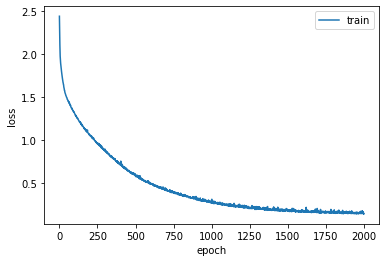

In [13]:
# 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [14]:
# 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 499us/sample - loss: 0.1394 - acc: 0.9200
acc: 92.00%


In [15]:
# 모델 사용하기
pred_count = 50   # 최대 예측 개수 정의

In [16]:
# 한 스텝 예측
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


#### [노래 듣기](http://tykimos.github.io/warehouse/2017-4-9-MLP_one_step_prediction.mp3)

In [17]:
# 곡 전체 예측
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(MAX_IDX_VALUE) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(MAX_IDX_VALUE))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


#### [노래듣기](http://tykimos.github.io/warehouse/2017-4-9-MLP_full_song_prediction.mp3)